In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
len(x_test)

10000

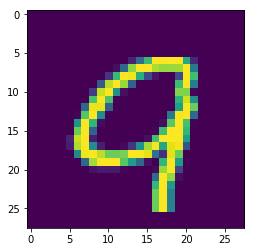

In [0]:
X = x_train[3000]
plt.imshow(X)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Flatten(input_shape = (28,28)))

In [0]:
model.add(Dense(50, activation = 'relu'))

In [0]:
model.add(Dense(58, activation = 'relu'))

In [0]:
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.09),metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 58)                2958      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2950      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 48,218
Trainable params: 48,218
Non-trainable params: 0
__________________________________________________

In [0]:
model.fit(x_train,y_train,batch_size=100, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0040 - acc: 0.9768
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0040 - acc: 0.9771
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0040 - acc: 0.9775
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0039 - acc: 0.9778
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0039 - acc: 0.9780
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0038 - acc: 0.9779
Epoch 7/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0038 - acc: 0.9784
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0038 - acc: 0.9787
Epoch 9/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0037 - acc: 0.9790
Epoch 10/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0037 - acc: 0.9790

In [0]:
predict = model.predict(x_test)

In [0]:
predict[300]

array([1.0352020e-06, 4.7922959e-03, 2.9418983e-03, 6.7793934e-07,
       9.5387667e-01, 6.5191095e-08, 1.5966348e-02, 2.2393923e-02,
       9.7432458e-06, 1.7377166e-05], dtype=float32)

In [0]:
predict = model.predict_classes(x_test)

(4, <matplotlib.image.AxesImage at 0x7f6becb19278>)

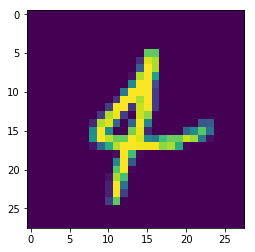

In [0]:
predict[300],plt.imshow(x_test[300])

In [0]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 29us/step


In [0]:
score[0],score[1]

(0.005321170132368951, 0.9663)

In [0]:
model.